# D206 Assesment

## Inspect the data
#### Results of the inspections and analysis are in section B of [Assessment.md](./Assesment.md) the plan for cleaning the data follows in section C

In [2]:
# get helper functions from ./transformations.py
%run -i transformations.py

## Transform and Clean the data


In [30]:
import pandas as pd


# set Pandas display options to display all colums
pd.set_option('display.max_columns', None)
# Data Path Options
# ./data/medical/medical_raw_data.csv
# ./data/churn/churn_raw_data.csv
df = pd.read_csv("./data/medical/medical_raw_data.csv")

# Rename Column Unamed: 0 to data_index
df.rename(columns={"Unnamed: 0":"data_index"}, inplace=True)

# Transform bool values to bit values
yes_no_features = ["ReAdmis",
                   "Soft_drink",
                    "HighBlood",
                    "Stroke",
                    "Arthritis",
                    "Diabetes",
                    "Hyperlipidemia",
                    "BackPain",
                    "Allergic_rhinitis",
                    "Reflux_esophagitis",
                    "Asthma"
                    ]

for feature in yes_no_features:
    df[feature].replace(("Yes", "No"), (1,0), inplace=True)

# drop all non-number values:
non_number_features = ["Area","City","Complication_risk","County","Customer_id","Education","Employment","Gender","Initial_admin","Job","Marital","Services","State","Timezone", "data_index"]
df.drop(non_number_features, axis=1, inplace=True)

# Drop Nan features for bit values
bit_features = yes_no_features + float_should_be_bit
df.dropna(subset=bit_features, inplace=True)

df.describe()

# Overweight - Is currently Float. Check for bad values. Should only by 0 and 1.
# Anxiety - Is currently Float. Check for bad values. Should only by 0 and 1.
float_should_be_bit = ["Overweight", "Anxiety"]
print(f"Total rows in dataset: {len(df.index)}")
for feature in float_should_be_bit:
    temp_df = df.query(f'{feature} != 1 and {feature} != 0')
    if len(temp_df.index) > 0:
        print(f"{len(temp_df.index)} rows of bad data in the {feature} column")

# Drop guid other than UID
redundant_features = ["Interaction", "CaseOrder", "UID", ]
print(f"Dropping rows {', '.join(redundant_features)}")
df.drop(redundant_features, axis=1, inplace=True)


# Assign Mean Value for Nan Cost and Survey Responses
item_names = ["Item1","Item2","Item3","Item4","Item5","Item5","Item7","Item8", "Income", "Age", "Initial_days", "Children"]
nan_mean_value_map = {}
for feature in item_names:
    nan_mean_value_map[feature] = int(round(df[feature].mean()))
df.fillna(value=nan_mean_value_map, inplace=True)

# TODO Discard Outliers 
df.head()

Total rows in dataset: 6144
Dropping rows Interaction, CaseOrder, UID


,Zip,Lat,Lng,Population,Children,Age,Income,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
4,23181,37.59894,-76.88958,5287,2.0,22.0,1209.56,0,16.870524,5,0,2,1.0,0,0,0.0,0,0,1,0,0.0,1,0,0,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3
5,74423,35.67302,-95.19180,981,2.0,76.0,40594.00,0,19.956143,6,0,0,0.0,0,0,1.0,1,1,0,1,0.0,1,0,0,5.957250,2774.089920,12742.589910,4,5,4,4,3,5,4,6
9,56362,45.40325,-94.71424,5840,2.0,78.0,38965.22,0,19.628554,7,1,2,0.0,1,0,1.0,0,0,0,0,0.0,1,1,1,1.632554,3709.547665,26225.989910,5,5,5,3,4,2,3,2
10,39326,32.59914,-88.67903,426,4.0,55.0,38503.82,0,17.613389,6,3,0,1.0,1,0,1.0,0,0,0,1,0.0,0,1,1,2.595912,3042.386578,18518.043170,3,3,4,4,2,5,2,3
11,32707,28.66268,-81.31427,35369,2.0,64.0,14126.30,0,47.813476,7,3,0,0.0,1,1,1.0,0,0,0,1,0.0,1,1,0,7.075083,14804.319330,21480.886130,4,5,5,5,3,3,3,3


In [31]:
# Analyze Outliers in non catagorical fields
non_categorical_columns = ['Population', 'Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'VitD_supp', 'Initial_days', 'TotalCharge', 'Additional_charges']
target_df = df[non_categorical_columns]
target_df.describe()

,Population,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Initial_days,TotalCharge,Additional_charges
count,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000,6144.000000
mean,10033.207357,2.064779,53.303548,40593.947052,19.445411,5.005859,0.999023,0.400228,34.423075,5902.696126,13011.675983
std,14942.880932,1.851838,18.023954,25266.651931,6.755324,1.059656,1.003331,0.633952,24.941566,3379.583048,6523.948166
min,0.000000,0.000000,18.000000,300.790000,9.574292,1.000000,0.000000,0.000000,1.001981,1256.751699,3132.259990
25%,691.750000,1.000000,41.000000,23796.505000,16.529430,4.000000,0.000000,0.000000,8.925664,3244.394300,8109.220687
50%,2746.500000,2.000000,53.000000,40594.000000,18.092642,5.000000,1.000000,0.000000,34.000000,5887.819683,11666.246320
75%,13996.750000,3.000000,66.000000,46456.410000,19.813842,6.000000,2.000000,1.000000,59.461108,7617.937170,15760.019800
max,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,7.000000,4.000000,71.965456,21524.224210,30566.073130


## Perform Principle Component Analysis

In [3]:
from sklearn.decomposition import PCA
normalized_df = (df - df.mean())/df.std()

pca = PCA(n_components=normalized_df.shape[1])
pca.fit(normalized_df)
principle_component_column_names = []
for column_number in range(len(normalized_df.columns)):
    principle_component_column_names.append("PrincipleComponent"+str(column_number))
pca_data_frame = pd.DataFrame(pca.transform(normalized_df), columns=principle_component_column_names)


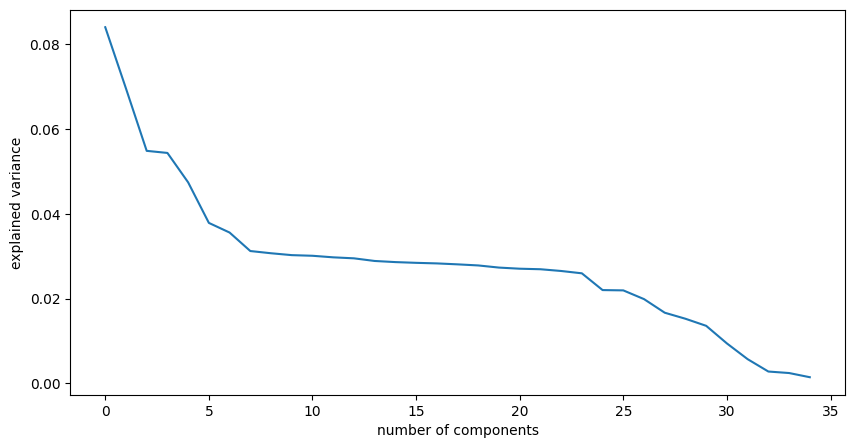

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

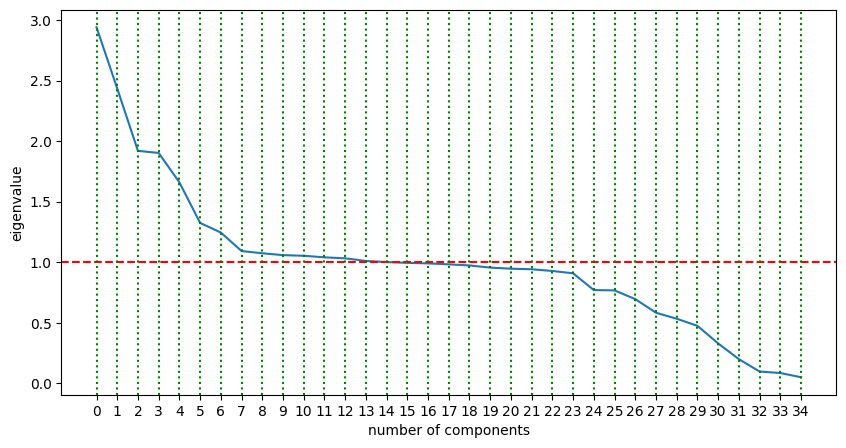

In [28]:
import numpy as np
cov_matrix = np.dot(normalized_df.T, normalized_df) / normalized_df.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)) for eigenvector in pca.components_]
plt.figure(figsize=(10,5))
plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.xticks(np.arange(0, normalized_df.shape[1]))
plt.ylabel('eigenvalue')
plt.axhline(y = 1, color = 'r', linestyle = '--')
for tick in range(normalized_df.shape[1]):
    plt.axvline(x = tick, color = 'g', linestyle = ':')
plt.show() 

In [11]:
loadings = pd.DataFrame(pca.components_.T,
     columns=principle_component_column_names,
     index=normalized_df.columns)
# loadings.sort_values(by = "PrincipleComponent0", inplace=True)
loadings

,PrincipleComponent0,PrincipleComponent1,PrincipleComponent2,PrincipleComponent3,PrincipleComponent4,PrincipleComponent5,PrincipleComponent6,PrincipleComponent7,PrincipleComponent8,PrincipleComponent9,PrincipleComponent10,PrincipleComponent11,PrincipleComponent12,PrincipleComponent13,PrincipleComponent14,PrincipleComponent15,PrincipleComponent16,PrincipleComponent17,PrincipleComponent18,PrincipleComponent19,PrincipleComponent20,PrincipleComponent21,PrincipleComponent22,PrincipleComponent23,PrincipleComponent24,PrincipleComponent25,PrincipleComponent26,PrincipleComponent27,PrincipleComponent28,PrincipleComponent29,PrincipleComponent30,PrincipleComponent31,PrincipleComponent32,PrincipleComponent33,PrincipleComponent34
Zip,-0.018344,0.037147,0.568517,0.405040,-0.060781,0.017964,0.031626,-0.003480,0.016859,0.003619,0.020063,0.016251,-0.008358,0.009621,-0.004751,-0.001727,-0.016554,-0.007922,0.009564,-0.012914,0.007023,-0.011920,-0.021895,0.010401,-0.113245,-0.029171,0.021766,-0.005833,0.001377,0.013098,-0.006454,-0.013803,0.066612,-0.696012,-0.000512
Lat,0.013227,-0.018416,0.029735,0.008220,-0.002834,0.065156,-0.676375,-0.143230,0.007667,0.072531,0.062591,-0.060403,0.070802,-0.017323,-0.010517,0.004544,0.071726,0.081296,-0.081565,0.001443,-0.119050,-0.004373,-0.056819,0.046987,0.631875,0.178676,-0.118221,-0.020950,-0.021044,-0.002240,-0.016190,-0.012183,0.017131,-0.114709,0.000490
Lng,0.011936,-0.033362,-0.573293,-0.402587,0.057803,-0.036213,0.052655,0.017026,-0.021948,-0.019287,-0.024559,-0.010265,-0.005223,-0.002310,0.002824,-0.009906,0.006157,-0.012888,0.009381,0.003576,0.001537,-0.000508,0.038259,-0.016249,-0.016571,-0.011838,0.013336,0.005886,-0.003047,0.008373,-0.003840,-0.014296,0.066945,-0.700799,0.005092
Population,-0.003952,0.022685,0.053386,0.042547,0.021766,-0.045511,0.657426,0.166241,-0.037904,-0.002013,-0.056051,-0.080970,-0.115463,-0.075861,0.038953,0.036085,-0.023175,0.001211,-0.058192,0.062416,-0.031291,0.020162,-0.012232,-0.007036,0.651995,0.209346,-0.135449,-0.018295,0.026623,-0.024553,-0.012987,-0.000589,0.001626,-0.029667,-0.001134
Children,0.005477,-0.002884,0.001704,0.019909,0.007482,-0.033405,-0.041588,0.158488,-0.407975,0.103129,0.236923,0.033013,-0.047976,-0.456638,0.159230,-0.150335,0.392423,0.078358,-0.165025,-0.091131,0.209736,0.429659,-0.103384,-0.186784,-0.080175,0.039577,-0.018848,0.008955,-0.002561,-0.008808,0.007077,-0.002120,0.001533,-0.004619,-0.005242
Age,-0.014931,0.019687,-0.284368,0.391830,-0.019351,-0.014955,-0.047406,0.270071,0.085822,-0.193230,0.146283,0.153145,0.059901,0.182720,-0.273590,-0.094433,-0.238330,0.209436,-0.130379,-0.205208,0.169763,0.128437,0.049860,-0.157043,0.042679,0.058855,-0.031462,0.014151,0.001971,-0.015486,0.008013,0.002529,0.486584,0.044331,-0.033950
Income,0.009345,-0.006851,-0.017437,0.007456,-0.002508,0.046892,0.073081,-0.028018,-0.072797,0.373538,0.258515,-0.088093,0.388447,0.308220,0.388119,-0.000527,-0.183366,0.039068,0.275577,-0.106098,0.350825,0.189221,0.119807,0.266453,0.083977,-0.030161,0.015451,0.006964,0.016933,-0.002366,-0.005957,0.004183,-0.004588,-0.005372,-0.000875
ReAdmis,-0.060865,0.523928,0.000505,-0.014305,0.063100,-0.379639,-0.041782,0.003367,0.001348,0.021565,-0.012690,0.020277,-0.006176,0.042341,0.028227,-0.012440,0.027651,-0.011011,0.064691,-0.002063,-0.009344,-0.002943,-0.016972,-0.010533,0.007881,-0.006519,-0.006064,-0.004580,-0.021560,0.016428,-0.015102,-0.743400,0.023453,0.022078,0.086763
VitD_levels,-0.013136,0.293857,-0.019416,-0.047815,-0.029918,0.749082,0.059137,0.005490,0.010453,-0.045721,0.017404,-0.051747,0.002119,-0.023062,-0.036835,0.012856,0.034055,-0.005722,-0.067468,-0.035632,0.021249,0.016568,0.007670,0.012914,-0.010245,-0.022786,0.001831,-0.013187,-0.000438,0.017266,0.001697,-0.123205,0.042194,0.004175,0.558553
Doc_visits,0.009809,-0.010241,-0.009102,0.016271,-0.010043,-0.005064,0.045452,-0.027976,-0.078804,0.452751,0.047425,-0.421563,-0.120863,0.493856,-0.131544,-0.022077,0.170260,-0.026973,-0.247409,-0.027954,-0.147915,-0.